# Importing Datasets

In [3]:
import pandas as pd
df1=pd.read_csv("inshort_news_data-1.csv")
df2=pd.read_csv("inshort_news_data-2.csv")
df3=pd.read_csv("inshort_news_data-3.csv")
df4=pd.read_csv("inshort_news_data-4.csv")
df5=pd.read_csv("inshort_news_data-5.csv")
df6=pd.read_csv("inshort_news_data-6.csv")
df7=pd.read_csv("inshort_news_data-7.csv")

# Merging Datasets

In [4]:
df_merged = pd.merge(df1, df2, how='outer')
df_merged = pd.merge(df_merged, df3, how='outer')
df_merged = pd.merge(df_merged, df4, how='outer')
df_merged = pd.merge(df_merged, df5, how='outer')
df_merged = pd.merge(df_merged, df6, how='outer')
df = pd.merge(df_merged, df7, how='outer')

In [5]:
df

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology
...,...,...,...,...
11706,1737,2 IAF doctors to soon leave for Russia to trai...,Two Indian Air Force doctors who have speciali...,science
11707,1738,NASA finds FM signal coming from Jupiter's moo...,NASA's Juno space probe has discovered an FM s...,science
11708,1739,New state of matter 'liquid glass' discovered:...,University of Konstanz's researchers have unco...,science
11709,1740,Astrophysicist Shashikumar Madhusudan Chitre p...,Renowned astrophysicist Professor Shashikumar ...,science


In [6]:
df["news_article"][5]

'The members of the Joint Parliamentary Committee are divided over key issues in the Personal Data Protection Bill, 2019, such as the provision allowing government access to sensitive data of citizens without their consent and data localisation, ET reported. The panel, chaired by BJP MP Meenakashi Lekhi, has held consultations with stakeholders like Facebook, Twitter, Google, Ola, Uber and Paytm.'

In [7]:
df["news_category"][5]

'technology'

# Feature Enginnering

In [43]:
df.isnull().sum()

Unnamed: 0       0
news_headline    0
news_article     0
news_category    0
dtype: int64

In [44]:
df = df[["news_article","news_category"]]

In [45]:
df

,news_article,news_category
0,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams will stop working on Internet ...,technology
2,"China, in response to reports of US adding Chi...",technology
3,The global smartphone sales in the third quart...,technology
4,The European Union (EU) is hoping that US Pres...,technology
...,...,...
11706,Two Indian Air Force doctors who have speciali...,science
11707,NASA's Juno space probe has discovered an FM s...,science
11708,University of Konstanz's researchers have unco...,science
11709,Renowned astrophysicist Professor Shashikumar ...,science


In [46]:
df.news_category.value_counts()

world            2017
entertainment    1986
sports           1850
technology       1741
politics         1546
science          1368
automobile       1203
Name: news_category, dtype: int64

In [47]:
df = df.drop(df[df['news_category'] == 'automobile'].index)
df.news_category.value_counts()

world            2017
entertainment    1986
sports           1850
technology       1741
politics         1546
science          1368
Name: news_category, dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["news_category_n"] = label.fit_transform(df["news_category"])

In [49]:
df.drop(["news_category"], axis="columns", inplace = True)

In [50]:
df

,news_article,news_category_n
0,DeepMind's AI system 'AlphaFold' has been reco...,4
1,Microsoft Teams will stop working on Internet ...,4
2,"China, in response to reports of US adding Chi...",4
3,The global smartphone sales in the third quart...,4
4,The European Union (EU) is hoping that US Pres...,4
...,...,...
11706,Two Indian Air Force doctors who have speciali...,2
11707,NASA's Juno space probe has discovered an FM s...,2
11708,University of Konstanz's researchers have unco...,2
11709,Renowned astrophysicist Professor Shashikumar ...,2


In [62]:
df.news_category_n.value_counts()

5    2017
0    1986
3    1850
4    1741
1    1546
2    1368
Name: news_category_n, dtype: int64

# Stop Words and Lemmatization

In [51]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")
def preprocess(text):
    doc = nlp(text)
    
    no_stop_word = []
    for token in doc:
        if not token.is_stop and not token.is_punct:
            no_stop_word.append(token.lemma_)
    return " ".join(no_stop_word)
    
df["No_stop_word"] = df["news_article"].apply(preprocess)

In [52]:
df["news_article"][0]
df.drop(["news_article"],axis="columns", inplace = True)

In [53]:
df["No_stop_word"][0]

'DeepMind AI system AlphaFold recognise solution protein folding grand challenge biology 50 year DeepMind show predict protein fold 3d shape complex process fundamental understand biological machinery life AlphaFold predict shape protein width atom'

In [54]:
df.head()

,news_category_n,No_stop_word
0,4,DeepMind AI system AlphaFold recognise solutio...
1,4,Microsoft Teams stop work Internet Explorer 11...
2,4,China response report add chinese chipmaker SM...
3,4,global smartphone sale quarter 2020 fall 5.7 y...
4,4,European Union EU hope President elect Joe Bid...


In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(df.No_stop_word, df.news_category_n , test_size= 0.2 , stratify= df.news_category_n )

# Model Building

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
clf = Pipeline([
    ("vectorizer_tfidf", TfidfVectorizer()),
    ("nb", MultinomialNB())
])
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
   
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       397
           1       0.96      0.94      0.95       309
           2       0.97      0.93      0.95       274
           3       0.99      0.93      0.96       370
           4       0.88      0.89      0.88       348
           5       0.84      0.89      0.86       404

    accuracy                           0.92      2102
   macro avg       0.93      0.92      0.92      2102
weighted avg       0.92      0.92      0.92      2102



In [58]:
clf.score(x_test,y_test)

0.9200761179828735

<Axes: >

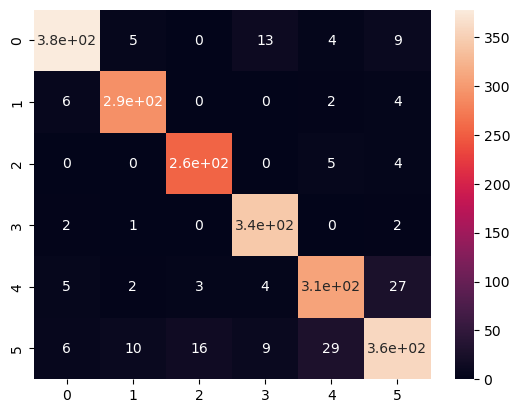

In [60]:
y=clf.predict(x_test)
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
result=confusion_matrix(y,y_test)
sns.heatmap(result,annot=True) # to display the predict of RandomForestRegressor for 0 and 

In [61]:
import pickle
with open("clf.pickle","wb") as f:
    pickle.dump(clf,f)